# Sanofi Paul Ricard
This notebook is being used to generate a nice image of cars around the Paul Ricard ciruit.

In [1]:
# import libraries
import plotly.graph_objects as go
import pandas as pd
import fastf1 as ff1
import numpy as np

In [3]:
# dir = "data/"
dir = "C:/Users/mark_/Documents/McLaren2021/Sanofi/Race Dashboard Data/"
df = pd.read_csv(dir + 'leaderboard.csv')
df.head()


,Unnamed: 0,Line,2021-04-15 00:00:00,2021-05-13 00:00:00,2021-06-10 00:00:00,2021-07-08 00:00:00,race_time,prev_race_time,Plant,position,gap_to_leader,prev_position,Gain/Loss,interval,OEE Start point,⇗ OEE% progress,OEE% Target (2022)
0,0,GAMMA1,89.153563,69.325767,68.226756,89.979194,316.685280,226.706086,SCOPPITO,1,0.000000,1,0,NaN,0.418683,0.085148,0.570
1,1,IMA C80/2,88.910252,69.256522,75.232693,89.674113,323.073580,233.399467,SCOPPITO,2,6.388299,2,0,6.388299,0.451031,0.043365,0.580
2,2,L18 Packaging Line,88.847299,74.226704,89.407996,89.425327,341.907326,252.481999,Tours,3,25.222045,3,0,18.833746,0.377683,0.086173,0.547
3,3,L25 Packaging Line,88.849775,74.908842,90.011979,89.862601,343.633196,253.770595,Tours,4,26.947916,4,0,1.725871,0.351564,0.001613,0.478
4,4,M22 Filling,88.953983,81.806345,84.857670,89.522488,345.140486,255.617998,Frankfurt,5,28.455206,5,0,1.507290,0.530068,0.120280,0.650


In [4]:
cars = df[['Line', 'gap_to_leader']]

In [16]:
# ff1.Cache.enable_cache('f1_cache')
ff1.Cache.enable_cache('f1_cache')
laps = ff1.get_session(2020, 'Silverstone', 'Q').load_laps(with_telemetry=True)
tel = laps.pick_driver('NOR').pick_fastest().telemetry

core           INFO 	Loading laps for British Grand Prix - Qualifying [v2.1.6]
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching track status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for car_data. Loading data...
api            INFO 	Fetching 

In [17]:
import matplotlib.pyplot as plt

In [18]:
plt.style.use('dark_background')

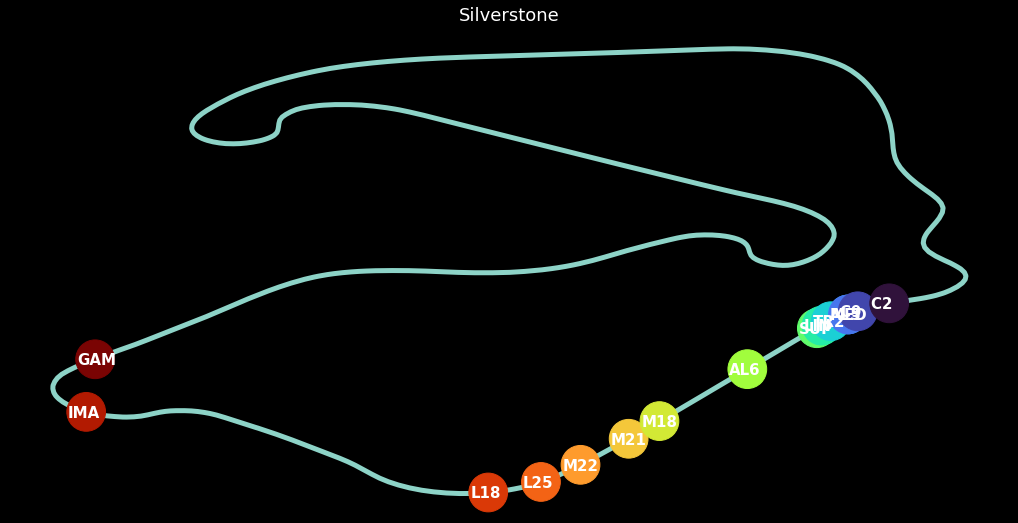

In [26]:
plt.figure(figsize=(18,9))
plt.plot(tel.X, tel.Y, zorder=1, lw=5)


result_x=[]
result_y=[]

t = np.linspace(1,15,len(cars))

#im = plt.imread('images/ch_flag.jpg')
#plt.imshow(im,x=tel.X.iloc[0], y=tel.Y.iloc[0],zorder=1, origin='lower')  

for i, row in cars.iterrows():
    result_x.__iadd__([tel.X.iloc[int(-5*(row[1]+1))]])
    result_y.__iadd__([tel.Y.iloc[int(-5*(row[1]+1))]])


plt.scatter(result_x, result_y, s=1500, c=t, cmap='turbo_r', zorder=2)
font = {'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

for i, row in cars.iterrows():
    plt.text(tel.X.iloc[int(-5*(row[1]+1))]-200, tel.Y.iloc[int(-5*(row[1]+1))]-200, row[0][:3], c='white')
#plt.scatter(300, -1930, marker = 'D', c='white', zorder=2)
#plt.scatter(160, -2330, marker = 'D', c='white', zorder=2)
#plt.scatter(460, -2130, marker = 'd', c='white', zorder=2)
#plt.scatter(300, -2130, marker = 'd', c='black', zorder=2)  
#plt.scatter(460, -1930, marker = 'd', c='black', zorder=2)  
#plt.scatter(600, -2130, marker = 'd', c='black', zorder=2) 
    
# for i, row in cars.iterrows():
#     plt.scatter(tel.X.iloc[int(-15*(row[1]+1))], tel.Y.iloc[int(-15*(row[1]+1))], s = 1000, c=t, cmap='Oranges', zorder=2)
#     plt.text(tel.X.iloc[int(-15*(row[1]+1))]-200, tel.Y.iloc[int(-15*(row[1]+1))], row[0][:3], c='white')

plt.title('Silverstone')
plt.axis('off')
plt.show()

In [25]:
tel.Y.iloc[-1]

-1932